In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
otu_df = pd.read_csv('dataframes/OTU.csv', sep='\t', index_col='OTU')
taxonomy_df = pd.read_csv('dataframes/hiera_BLAST.csv', sep='\t', index_col='OTU')
metadata_df = pd.read_csv('dataframes/YOGURT-MAP.csv', sep='\t', index_col='#SampleID')
path_df = pd.read_csv('dataframes/path_df.csv', sep = ',')
metadata_df = metadata_df.drop(columns=['fastqFile', 'Weight'])

In [47]:
otu_df_meta = otu_df.transpose()
merged = otu_df_meta.merge(metadata_df, left_index=True, right_index=True)
merged = merged.reindex(['Group'] + list(merged.columns[:-1]), axis=1)
merged.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
AA1,w4_con,1475,7122,5508,7923,2604,1791,1286,2931,660,...,0,0,0,0,0,0,1,0,0,0
AA10,w4_con,4326,3346,10053,10217,630,1024,465,704,106,...,0,0,0,0,0,0,0,0,1,0
AA2,w4_con,1604,3526,6370,12738,927,1329,967,810,268,...,1,0,0,0,1,0,1,0,0,0
AA3,w4_con,1473,19461,8274,8691,1051,2521,368,1930,228,...,0,0,0,0,0,0,0,0,0,0
AA4,w4_con,1776,4970,2659,9848,2568,2572,453,5418,96,...,0,3,0,0,0,0,0,0,0,1


In [48]:
merged_cmy = merged[~merged['Group'].isin(['w1_con', 'w4_con', 'w1_sch', 'w4_sch'])]
merged_cmy.loc[merged_cmy['Group'] == 'w1_pry', 'Group'] = 'CN'
merged_cmy.loc[merged_cmy['Group'] == 'w4_pry', 'Group'] = 'CMY'
#merged_cmy = merged_cmy.drop(['AB10','BA10'])
#merged_cmy_absolute = merged.copy()
#merged_cmy_absolute.to_excel('dataframes/output_data/16.07/taxonomy/initail_data_cmy.xlsx')
#merged_cmy_absolute.to_csv('dataframes/output_data/16.07/taxonomy/initail_data_cmy.tsv', sep='\t', index=True)
merged_cmy.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
AC1,CMY,8458,9217,1500,3700,501,3294,1147,6218,815,...,0,0,0,0,0,0,0,0,0,0
AC2,CMY,10760,4012,6097,1256,907,3012,1318,2583,449,...,0,0,0,0,0,0,0,0,0,0
AC3,CMY,11003,5941,2061,2797,517,2221,691,6976,576,...,1,0,0,0,0,0,0,0,0,0
AC4,CMY,2702,1870,2221,1912,569,1831,464,701,1846,...,0,0,0,0,0,0,0,0,0,0
AC5,CMY,9863,16672,2195,1720,419,2939,466,5098,296,...,0,0,0,0,1,0,0,0,0,0


In [49]:
merged_cmс = merged[~merged['Group'].isin(['w1_con', 'w4_con', 'w1_pry', 'w4_pry'])]
merged_cmс.loc[merged_cmс['Group'] == 'w1_sch', 'Group'] = 'CN'
merged_cmс.loc[merged_cmс['Group'] == 'w4_sch', 'Group'] = 'CMC'
#merged_cmс = merged_cmс.drop(['AB10','BA10'])
#merged_cmс_absolute = merged.copy()
#merged_cmс_absolute.to_excel('dataframes/output_data/16.07/taxonomy/initail_data_cmc.xlsx')
merged_cmс.to_csv('dataframes/output_data/OTU/initail_data_cmc.tsv', sep='\t', index=True)
merged_cmс.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
BA1,CMC,16175,7738,3505,1960,4025,1896,1285,565,1042,...,0,0,0,0,0,0,0,0,0,0
BA10,CMC,2072,5140,5629,2734,4532,2423,483,410,1708,...,0,1,0,0,0,0,0,1,0,1
BA2,CMC,7646,13008,3393,5050,6448,3521,509,150,2398,...,0,0,0,0,0,0,0,0,0,0
BA3,CMC,4450,1717,2649,1235,7077,5769,7078,415,7637,...,0,0,0,0,0,0,0,0,0,0
BA4,CMC,8499,4369,1880,1957,4682,2437,569,566,3966,...,0,0,0,0,0,0,0,0,0,0


In [50]:
def relative_abundance(df):
    # Создаем копию набора данных для избежания предупреждения
    df_copy = df.copy()
    # Добавляем столбец с общим количеством OTU для каждого образца
    df_copy['OTU_total'] = df_copy.iloc[:, 1:].sum(axis=1)

    # Рассчитываем относительное изобилие
    df_copy.loc[:, df_copy.columns[1:-1]] = df_copy.loc[:, df_copy.columns[1:-1]].div(df_copy['OTU_total'], axis=0)

    # Удаляем столбец OTU_total, так как он нам больше не нужен
    df_copy.drop(columns=['OTU_total'], inplace=True)
    # df_copy = df_copy.applymap(lambda x: str(x).replace('.', ','))
    # df_copy.T.to_excel('dataframes/output_data/16.07/taxonomy/otu_relative_abundance.xlsx')
    return df_copy

merged_cmс_rel_abund = relative_abundance(merged_cmс)
merged_cmy_rel_abund = relative_abundance(merged_cmy)

# Z - scaling
https://www.simplypsychology.org/z-score.html#:~:text=The%20value%20of%20the%20z,standard%20deviation%20above%20the%20mean.

In [51]:
def z_scaling(df):
    group = df['Group']
    data_without_group = df.drop(columns=['Group'])
    data_without_group = data_without_group.loc[:, (data_without_group != data_without_group.iloc[0]).any()] 
    transformed_data = (data_without_group - data_without_group.mean()) / data_without_group.std()
    transformed_data.insert(0, 'Group', group)
    return transformed_data  

z_scaler_cmc = z_scaling(merged_cmс)
z_scaler_cmc.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,0.558711,0.768029,-0.160852,-0.137499,-0.046025,-0.429230,-0.651972,-0.020523,-0.804299,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA10,CMC,-0.669228,0.061552,0.707271,0.025941,0.109126,-0.108305,-0.844148,-0.382017,-0.533796,...,4.248529,4.248529,-0.223607,4.248529,-0.223607,-0.324893,-0.223607,2.924038,-0.223607,4.248529
BA2,CMC,-0.183904,2.201106,-0.206629,0.514996,0.695457,0.560341,-0.837918,-0.988392,-0.253546,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA3,CMC,-0.462177,-0.869269,-0.510717,-0.290593,0.887943,1.929298,0.736151,-0.370355,1.874329,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA4,CMC,-0.109633,-0.148107,-0.825023,-0.138133,0.155029,-0.099779,-0.823541,-0.018191,0.383314,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607


# Box Cox transformation

https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/#:~:text=What%20is%20the%20Box%20Cox,predictions%20made%20using%20linear%20regression.

In [52]:
from scipy import stats

def box_cox_transformation(df):
    group = df['Group']
    data_without_group = df.drop(columns=['Group'])
    data_without_group = data_without_group.loc[:, (data_without_group != data_without_group.iloc[0]).any()] 
    data_without_group_transformed = data_without_group.apply(lambda x: stats.boxcox(x + 1)[0])
    data_without_group_transformed.insert(0, 'Group', group)
    return data_without_group_transformed

box_cox_cmc = box_cox_transformation(merged_cmс)
box_cox_cmy = box_cox_transformation(merged_cmy)
box_cox_cmy.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1501,OTU1502,OTU1503,OTU1505,OTU1507,OTU1509,OTU1510,OTU1512,OTU1513,OTU1514
AC1,CMY,10.582079,6.755748,2.684088,39.983186,5.011016,5.243227,8.394447,18.859854,6.157722,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC2,CMY,10.910450,6.302335,2.775353,27.416086,5.381476,5.208219,8.590306,15.592424,5.653049,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC3,CMY,10.941051,6.519610,2.708749,36.301989,5.031028,5.086290,7.691468,19.322347,5.864786,...,0.0,0.0,0.0,0.07301,0.0,0.000000,0.0,0.0,0.0,0.0
AC4,CMY,9.061581,5.862557,2.714173,31.796442,5.091765,5.006747,7.151302,11.508975,6.837947,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC5,CMY,10.791401,7.063208,2.713328,30.637313,4.896397,5.198558,7.157078,18.080907,5.296099,...,0.0,0.0,0.0,0.00000,0.0,0.036481,0.0,0.0,0.0,0.0


In [53]:
box_rel_cmc = relative_abundance(box_cox_cmc)
z_rel_cmc = relative_abundance(z_scaler_cmc)
z_rel_cmc.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,0.011903,0.016362,-0.003427,-0.002929,-0.000980,-0.009144,-0.013889,-0.000437,-0.017134,...,-0.004764,-0.004764,-0.004764,-0.004764,-0.004764,-0.006921,-0.004764,-0.006921,-0.004764,-0.004764
BA10,CMC,-0.000651,0.000060,0.000688,0.000025,0.000106,-0.000105,-0.000821,-0.000372,-0.000519,...,0.004132,0.004132,-0.000217,0.004132,-0.000217,-0.000316,-0.000217,0.002844,-0.000217,0.004132
BA2,CMC,0.002223,-0.026602,0.002497,-0.006224,-0.008405,-0.006772,0.010127,0.011945,0.003064,...,0.002702,0.002702,0.002702,0.002702,0.002702,0.003927,0.002702,0.003927,0.002702,0.002702
BA3,CMC,0.002371,0.004460,0.002620,0.001491,-0.004556,-0.009898,-0.003777,0.001900,-0.009616,...,0.001147,0.001147,0.001147,0.001147,0.001147,0.001667,0.001147,0.001667,0.001147,0.001147
BA4,CMC,0.001100,0.001486,0.008280,0.001386,-0.001556,0.001001,0.008265,0.000183,-0.003847,...,0.002244,0.002244,0.002244,0.002244,0.002244,0.003260,0.002244,0.003260,0.002244,0.002244


In [54]:
merged_deleted_cmc = merged_cmс.loc[:, (merged_cmс != merged_cmс.iloc[0]).any()] 
merged_deleted_cmy = merged_cmy.loc[:, (merged_cmy != merged_cmy.iloc[0]).any()] 
merged_deleted_cmc_rel = relative_abundance(merged_deleted_cmc)
merged_deleted_cmy_rel = relative_abundance(merged_deleted_cmy)

In [55]:
from scipy.stats import ttest_ind

#df_copy = merged_deleted_cmc.copy()
#df_copy = box_rel_cmc.copy()
df_copy = z_rel_cmc.copy()

# Разделение DataFrame на две группы
group_cmc = df_copy[df_copy['Group'] == 'CMC']
group_cn = df_copy[df_copy['Group'] == 'CN']

# Создание пустой DataFrame для хранения результатов
p_values = pd.DataFrame(index=['p-value'], columns=df_copy.columns[1:])

# Проведите t-тест для каждого столбца и сохраните p-value
for column in df_copy.columns[1:]:
    t_stat, p_val = ttest_ind(group_cmc[column], group_cn[column], equal_var=False, nan_policy='omit') # t-test Стьюдента
    p_values[column] = p_val

# Транспонирование DataFrame и переименование столбцов
p_values = p_values.transpose().reset_index()
p_values.columns = ['OTU', 'CN_vs_CMC_p_value']

# Рассчет средних значений для каждой группы и добавьте их в DataFrame
p_values['CN'] = group_cn.mean(numeric_only=True).values
p_values['CMC'] = group_cmc.mean(numeric_only=True).values

# Изменение порядка столбцов
p_values = p_values[['OTU', 'CN', 'CMC', 'CN_vs_CMC_p_value']]

less_zero_five = p_values.loc[(p_values['CN_vs_CMC_p_value'] <= 0.05)]

less_zero_five

,OTU,CN,CMC,CN_vs_CMC_p_value
408,OTU412,-0.012325,0.008362,0.015637
429,OTU435,0.017161,0.001969,0.044879
817,OTU846,0.016389,-0.011944,0.033378
981,OTU1048,0.014490,-0.003218,0.039069
996,OTU1066,-0.013274,0.006996,0.016872
1218,OTU1358,-0.010427,0.009785,0.028648


Статистический анализ. Крускал Уоллис p<=0.05

In [56]:
import scipy.stats as stats
import statsmodels.stats.multitest as smt
import scikit_posthocs as sp

#df = merged_cmy_rel_abund.copy()
df_cmc = merged_deleted_cmc_rel.copy()
df_cmy = merged_deleted_cmy_rel.copy()
# df_cmc.to_csv('dataframes/output_data/OTU/df_cmc.csv', sep='\t', index=True)
# df_cmy.to_csv('dataframes/output_data/OTU/df_cmy.csv', sep='\t', index=True)
#df = box_rel_cmc.copy()
#df = z_rel_cmc.copy()

def kruskal_pvalues_filter(df, group1):
    # Разделяем датафрейм на две группы
    group_cmc = df[df['Group'] == group1]
    group_cn = df[df['Group'] == 'CN']

    # Тест Kruskal-Wallis
    kruskal_pvalues = [stats.kruskal(group_cmc[otu], group_cn[otu], nan_policy='omit')[1] for otu in df.columns[1:]]

    # Создание DataFrame для хранения результатов
    results = pd.DataFrame({
        'OTU': df.columns[1:],
        'Kruskal_pvalue': kruskal_pvalues,
    })

    # Средние значения для каждой группы
    results['CN_mean'] = group_cn.mean(numeric_only=True).values
    results[f'{group1}_mean'] = group_cmc.mean(numeric_only=True).values

    results = results.loc[results['CN_mean'] > 0.001]
    results = results.loc[results[f'{group1}_mean'] > 0.001]
    return results.loc[(results['Kruskal_pvalue'] <= 0.05)]

less_zero_five_cmc = kruskal_pvalues_filter(df_cmc, 'CMC')
less_zero_five_cmy = kruskal_pvalues_filter(df_cmy, 'CMY')
print(f'CMY dataframe (P-value <= 0.05): {less_zero_five_cmy.shape}')
print(f'CMC dataframe (P-value <= 0.05): {less_zero_five_cmc.shape}')
less_zero_five_cmy.head()


CMY dataframe (P-value <= 0.05): (38, 4)
CMC dataframe (P-value <= 0.05): (23, 4)


,OTU,Kruskal_pvalue,CN_mean,CMY_mean
1,OTU2,0.022243,0.024608,0.061842
2,OTU3,0.022243,0.043436,0.022297
4,OTU5,0.000327,0.031272,0.005028
7,OTU8,0.004267,0.012308,0.039452
8,OTU9,0.005502,0.023517,0.007176


In [57]:
def transpose_df(df):    
    less_zero_five_transposed = df.T
    less_zero_five_transposed.columns = less_zero_five_transposed.iloc[0]
    return less_zero_five_transposed[1:]
less_zero_five_transposed_cmc = transpose_df(less_zero_five_cmc)
less_zero_five_transposed_cmy = transpose_df(less_zero_five_cmy)

In [58]:
# Импортируем библиотеку pandas
import pandas as pd

def preparing_data(started_df, transposed_df):
    # Сначала получим список всех OTU в merged_deleted_cmc_rel
    all_otus_in_merged = started_df.columns.to_list()

    # Затем получим список всех OTU в less_zero_five_transposed
    otus_in_less_zero_five_transposed = transposed_df.columns.to_list()

    # Определим, какие OTU присутствуют в merged_deleted_cmc_rel, но отсутствуют в less_zero_five_transposed
    otus_to_drop = [otu for otu in all_otus_in_merged if otu not in otus_in_less_zero_five_transposed and otu != 'Group']

    # Теперь удалим эти столбцы из merged_deleted_cmc_rel
    return started_df.drop(columns=otus_to_drop)

merged_deleted_cmc_rel_dropped = preparing_data(df_cmc, less_zero_five_transposed_cmc)
merged_deleted_cmy_rel_dropped = preparing_data(df_cmy, less_zero_five_transposed_cmy)

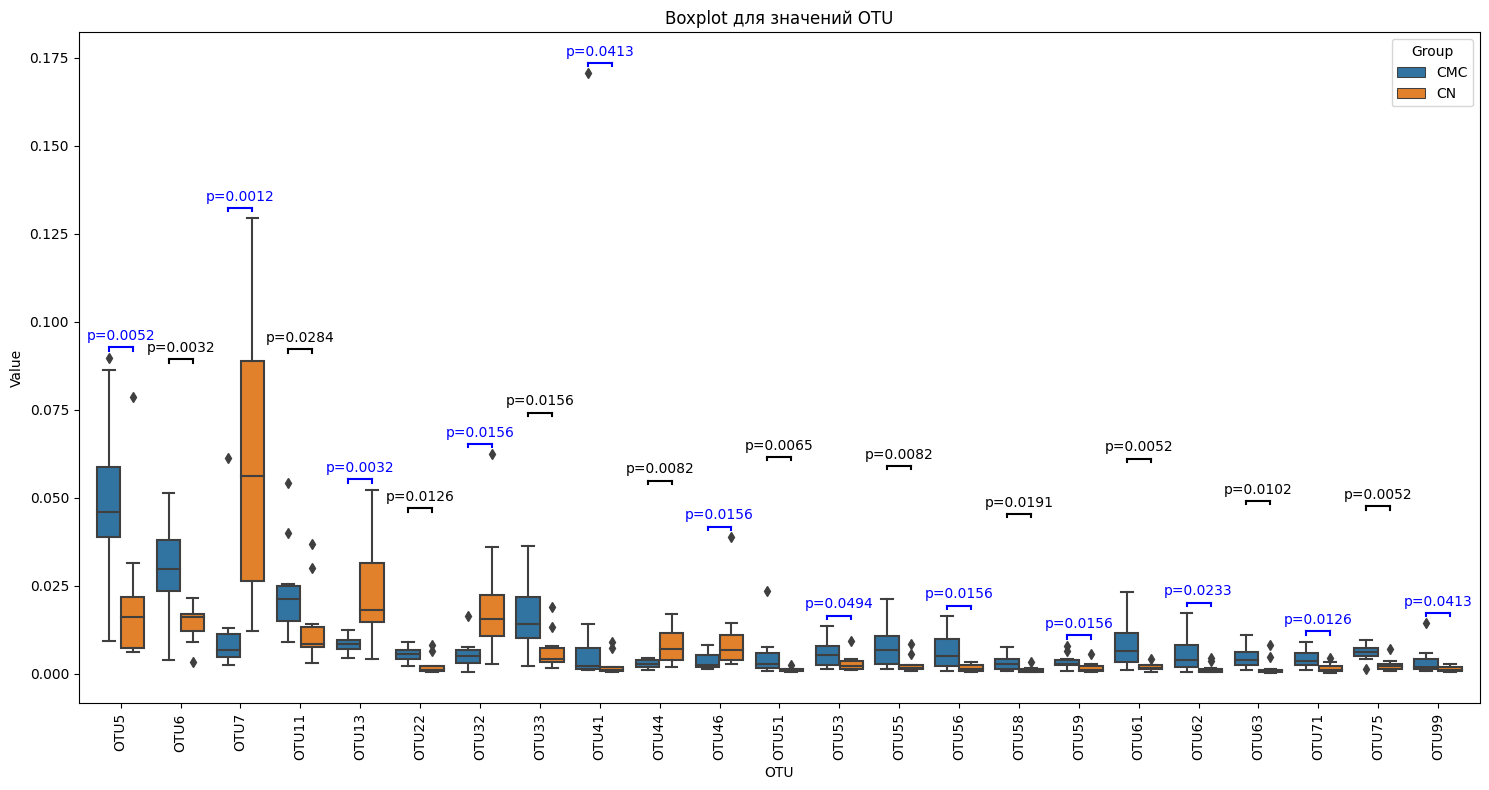

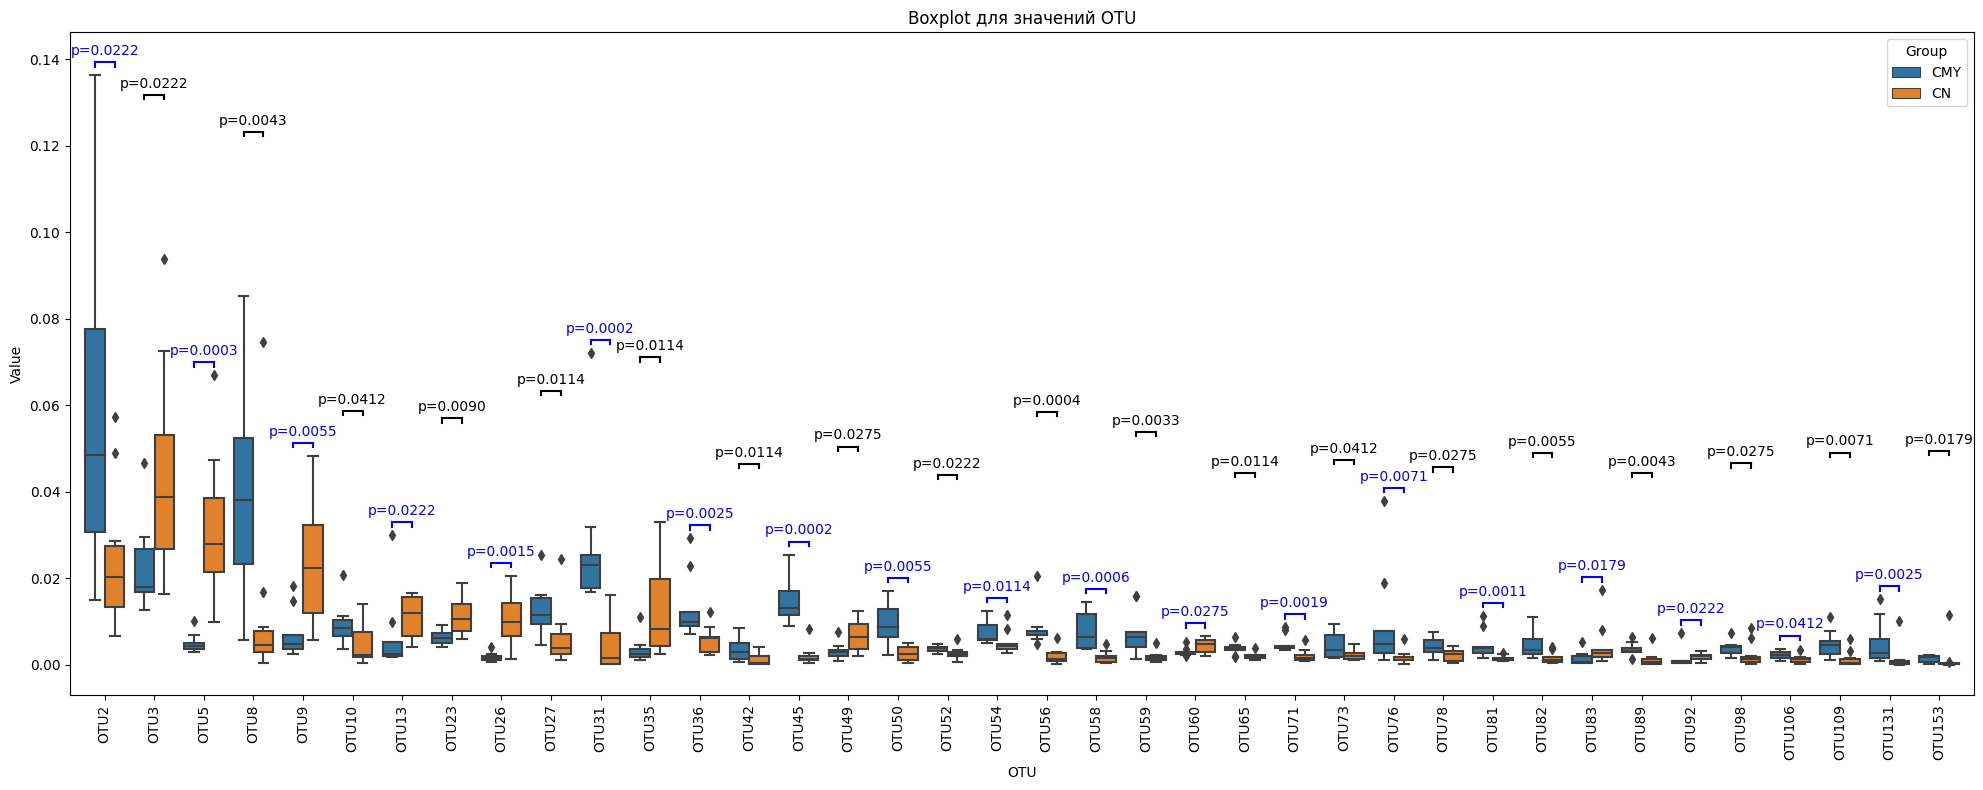

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def relative_abundance_boxplot(df_dropped, transpose_df, df_group):
    # Преобразуем данные в длинный формат с помощью функции melt в pandas
    data_melt = df_dropped.melt(id_vars='Group', var_name='OTU', value_name='Value')

    # Фильтруем данные только для групп CN и CMC
    data_melt = data_melt[data_melt['Group'].isin(['CN', df_group])]

    # Создаем boxplot
    if df_group == "CMY":
        plt.figure(figsize=(20, 8))
    else:
        plt.figure(figsize=(15, 8))

    ax = sns.boxplot(data=data_melt, x='OTU', y='Value', hue='Group')

    # Получаем значения p-value
    p_values = transpose_df.loc['Kruskal_pvalue'].to_dict()

    # Находим максимальное значение y для каждого OTU
    y_max_values = data_melt.groupby('OTU')['Value'].max()

    # Выводим значения p-value и линии для групп 'CN' и 'CMC'
    for i, otu in enumerate(data_melt['OTU'].unique()):
        p_value = p_values.get(otu, np.nan)
        y_max = y_max_values[otu]
        if i % 2==0:
            height = 0.003
            ax.annotate(f'p={p_value:.4f}', xy=(i, y_max + height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10, color = 'blue')
        else:
            height = 0.038
            ax.annotate(f'p={p_value:.4f}', xy=(i, y_max + height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)
        
        # Добавляем вертикальные линии
        x1 = i - 0.2
        x2 = i + 0.2
        
        line_width = 1.5
        y_line = y_max + height  # Y-координата горизонтальной линии
        if i % 2==0:
            line_color = 'blue'
            ax.plot([x1, x1], [y_max+.002, y_line], color=line_color, lw=line_width)
            ax.plot([x2, x2], [y_max+.002, y_line], color=line_color, lw=line_width)
            ax.plot([x1, x2], [y_line, y_line], color=line_color, lw=line_width)  # Горизонтальная линия
        else:
            line_color = 'black'
            ax.plot([x1, x1], [y_max+.037, y_line], color=line_color, lw=line_width)
            ax.plot([x2, x2], [y_max+.037, y_line], color=line_color, lw=line_width)
            ax.plot([x1, x2], [y_line, y_line], color=line_color, lw=line_width)  # Горизонтальная линия

    # Показываем график
    plt.title('Boxplot для значений OTU')
    plt.xticks(rotation=90)
    plt.tight_layout()
    if df_group == "CMY":
        plt.savefig('figures/realtive_ab/seaborn_boxplot_cmy.pdf', bbox_inches = 'tight')
    else:
        plt.savefig('figures/realtive_ab/seaborn_boxplot_cmc.pdf', bbox_inches = 'tight')
    plt.show()

relative_abundance_boxplot(merged_deleted_cmc_rel_dropped, less_zero_five_transposed_cmc, 'CMC')
relative_abundance_boxplot(merged_deleted_cmy_rel_dropped, less_zero_five_transposed_cmy, 'CMY')

In [60]:
import plotly.express as px
import numpy as np
import pandas as pd

def plotly_boxplot(df_dropped, df_transposed):
    # Преобразуем данные в длинный формат с помощью функции melt в pandas
    data_melt = df_dropped.melt(id_vars='Group', var_name='OTU', value_name='Value')

    # Получаем значения p-value
    p_values = df_transposed.loc['Kruskal_pvalue'].to_dict()
    print(df_dropped.shape[1])
    # Находим максимальное значение y для каждого OTU
    y_max_values = data_melt.groupby('OTU')['Value'].max()
    # Создаем словарь для аннотаций
    annotations = []
    for i, otu in enumerate(data_melt['OTU'].unique()):
        p_value = p_values.get(otu, np.nan)  # получаем p-value для каждого OTU
        if i%2 == 0:
            y_max = y_max_values[otu]+0.01
            annotations.append(dict(x=otu, y=y_max, text=f'p={p_value:.3f}', showarrow=False))
        else:
            y_max = y_max_values[otu]+0.07
            annotations.append(dict(x=otu, y=y_max, text=f'p={p_value:.3f}', showarrow=False))

    # Создаем boxplot
    fig = px.box(data_melt, x="OTU", y="Value", color="Group", points="all", 
                title='Boxplot for OTU values', 
                color_discrete_sequence=px.colors.qualitative.Vivid)  # здесь можно поменять цвета
    
    width = 1500 if df_dropped.shape[1] < 25 else 1800
    
    fig.update_layout(
        annotations=annotations,  # Добавляем аннотации
        showlegend=True,
        plot_bgcolor='rgba(0,0,0,0)',  # задаем прозрачный фон
        width=width,  # задаем ширину графика
        height=800,  # задаем высоту графика
    )

    # Убираем сетку и задаем границы
    fig.update_xaxes(showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black')
    fig.update_yaxes(showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black')
    # Сохраняем график в статическом PNG формате
    # import plotly.io as pio
    # pio.kaleido.scope.executable = '/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/kaleido/executable/bin/kaleido'
    # fig.write_image("figures/realtive_ab/boxplot.png")


    # Сохраняем график в интерактивном HTML формате
    fig.write_html(f"figures/realtive_ab/plotly_boxplot_{'CMC' if df_dropped.shape[1] < 25 else 'CMY'}.html")
    fig.show()

plotly_boxplot(merged_deleted_cmc_rel_dropped, less_zero_five_transposed_cmc)
plotly_boxplot(merged_deleted_cmy_rel_dropped, less_zero_five_transposed_cmy)


24


39


In [61]:
from skbio.diversity import alpha_diversity


def alpha_diversity_calculating(df_deleted_rel_dropped):
    df_rel = df_deleted_rel_dropped.copy()
    data_without_group = df_rel.drop(columns=['Group'])
    data_without_group[data_without_group <= 0] = 1e-10
    shannon_diversity = alpha_diversity('shannon', data_without_group)
    simpson_diversity = alpha_diversity('simpson', data_without_group)

    shannon_diversity.index = df_rel.index
    simpson_diversity.index = df_rel.index

    df_rel['Shannon'] = shannon_diversity
    df_rel['Simpson'] = simpson_diversity

    return df_rel
alpha_cmc = alpha_diversity_calculating(merged_deleted_cmc_rel_dropped)
alpha_cmy = alpha_diversity_calculating(merged_deleted_cmy_rel_dropped)

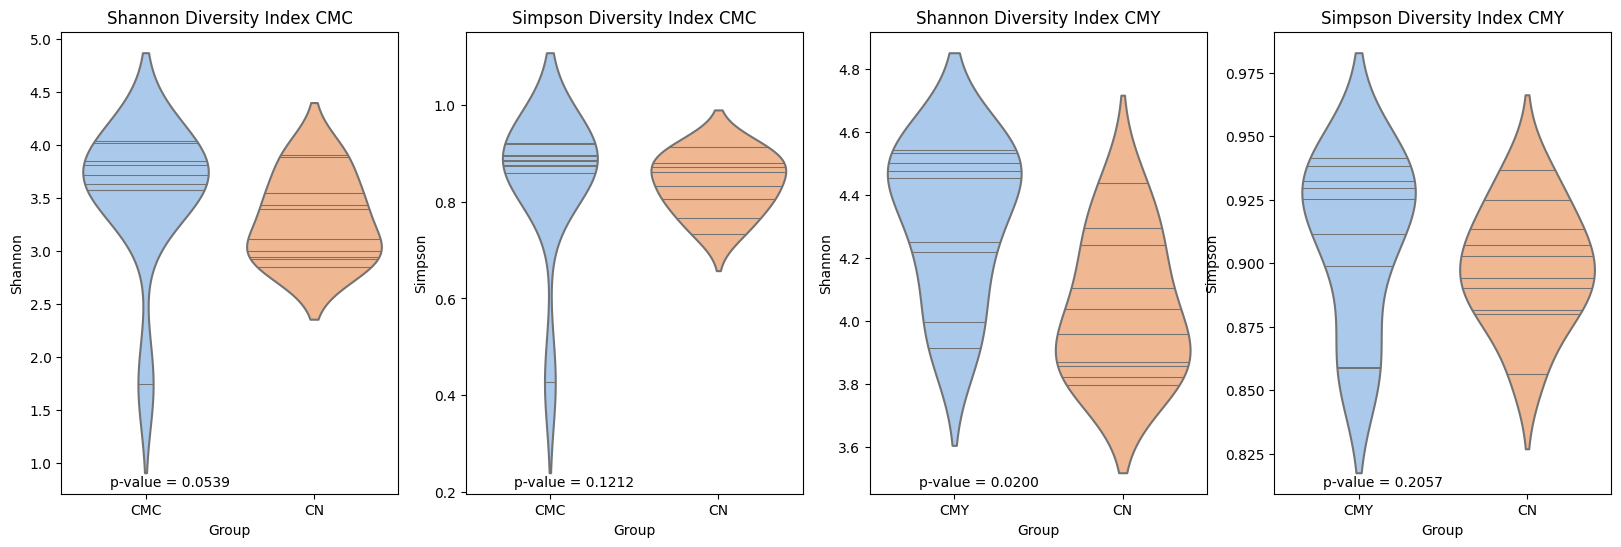

In [62]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

def alpha_vizualization(df_cmc, df_cmy):
    for i in range(4):
        plt.subplot(1, 4, i+1)
        metric = "Shannon" if i % 2==0 else "Simpson"
        df = df_cmc if i < 2 else df_cmy
        sns.violinplot(x="Group", y=metric, data=df, inner="stick", palette='pastel')
        plt.title(f"{'Shannon' if i % 2 == 0 else 'Simpson'} Diversity Index {'CMC' if i < 2 else 'CMY'}")
        groups = df["Group"].unique()
        group1 = df[df["Group"] == groups[0]][metric]
        group2 = df[df["Group"] == groups[1]][metric]
        _, p_value = mannwhitneyu(group1, group2)
        
        plt.title(f"{metric} Diversity Index {'CMC' if i < 2 else 'CMY'}")
        
        # Добавление p-значения внутри графика
        plt.text(0.5, 0.01, f'p-value = {p_value:.4f}', horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

    plt.savefig('figures/alpha_diversity/alpha_swarm.pdf', bbox_inches = 'tight')
    plt.show()

alpha_vizualization(alpha_cmc, alpha_cmy)



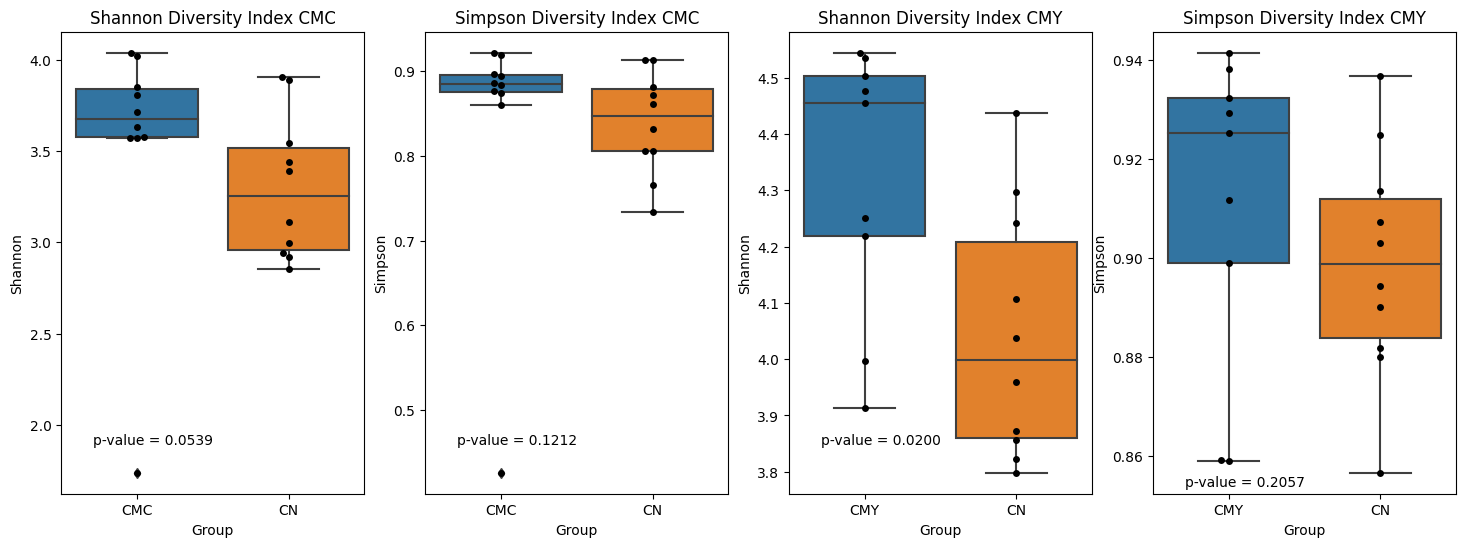

In [63]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

def alpha_vizualization(df_cmc, df_cmy):
    for i in range(4):
        plt.subplot(1, 4, i+1)
        metric = "Shannon" if i % 2==0 else "Simpson"
        df = df_cmc if i < 2 else df_cmy
        
        sns.boxplot(x="Group", y=metric, data=df)
        sns.swarmplot(x="Group", y=metric, data=df, color='black')
        
        groups = df["Group"].unique()
        group1 = df[df["Group"] == groups[0]][metric]
        group2 = df[df["Group"] == groups[1]][metric]
        _, p_value = mannwhitneyu(group1, group2)
        
        plt.title(f"{metric} Diversity Index {'CMC' if i < 2 else 'CMY'}")
        
        # Добавление p-значения внутри графика
        plt.text(0.5, 0.01 if i == 3 else 0.1, f'p-value = {p_value:.4f}', horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

    plt.savefig('figures/alpha_diversity/alpha_boxplot.pdf', bbox_inches = 'tight')
    plt.show()

alpha_vizualization(alpha_cmc, alpha_cmy)


In [64]:
from scipy.stats import mannwhitneyu
import plotly.graph_objects as go

def alpha_vizualization(df_cmc, df_cmy, box_colors=['blue', 'green'], line_color='black'):
    for i in range(4):
        metric = "Shannon" if i % 2 == 0 else "Simpson"
        df = df_cmc if i < 2 else df_cmy

        fig = go.Figure()

        # Box Plot
        for idx, group in enumerate(df["Group"].unique()):
            group_data = df[df["Group"] == group][metric]
            color_idx = idx % len(box_colors) # Используем индекс для выбора цвета из списка
            fig.add_trace(go.Box(y=group_data, name=group, fillcolor=box_colors[color_idx], line=dict(color=line_color)))

        # P-value Calculation
        groups = df["Group"].unique()
        group1 = df[df["Group"] == groups[0]][metric]
        group2 = df[df["Group"] == groups[1]][metric]
        _, p_value = mannwhitneyu(group1, group2)

        # Adding P-value as annotation
        fig.add_annotation(x=0.5, y=0.05, xref="paper", yref="paper", text=f'p = {p_value:.4f}', showarrow=False)

        fig.update_layout(
            title=f"{metric} Diversity Index {'CMC' if i < 2 else 'CMY'}",
            width=450,
            height=600,
            paper_bgcolor="rgba(255,255,255,255)",
            plot_bgcolor="rgba(255,255,255,255)",
            xaxis_title="Group",
            yaxis_title=metric
        )

        # Adding border
        fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
        fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
        fig.write_html(f"figures/alpha_diversity/plotly_alpha_{metric}_{'CMC' if i < 2 else 'CMY'}.html")
        fig.show()



alpha_vizualization(alpha_cmc, alpha_cmy, box_colors=['#2d75a2', '#e28228'], line_color='black')


In [65]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import numpy as np

# Извлечение числовых данных
df_beta_cmc = merged_deleted_cmc_rel_dropped
df_beta_cmy = merged_deleted_cmy_rel_dropped


def rarify(matrix, count):
    rarified_matrix = []
    for row in matrix:
        if row.sum() > count:
            probs = row / row.sum()
            rarified_row = np.random.multinomial(count, probs)
            rarified_matrix.append(rarified_row)
        else:
            rarified_matrix.append(row)
    return np.array(rarified_matrix)



def hellinger_transformation(matrix):
    # Применение квадратного корня к каждому элементу
    transformed_matrix = np.sqrt(matrix)
    # Нормализация строк
    normalized_matrix = normalize(transformed_matrix, norm='l1', axis=1)
    return normalized_matrix


def beta_preparing(df_beta, hellinger=False, rarify_count=False):
    data_matrix = df_beta.drop(columns='Group').values
    
    # Применение преобразования Хеллингера
    if hellinger:
        data_matrix = hellinger_transformation(data_matrix)
    
    # Применение редкификации, если указано
    if rarify_count:
        data_matrix = rarify(data_matrix, rarify_count)

    # Расчет Bray-Curtis dissimilarity
    return pairwise_distances(data_matrix, metric='braycurtis')


bray_curtis_distances_cmc = beta_preparing(df_beta_cmc, False, False)
bray_curtis_distances_cmy = beta_preparing(df_beta_cmy, False, False)

/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.04073317422076295 and the largest is 1.013350450197614.



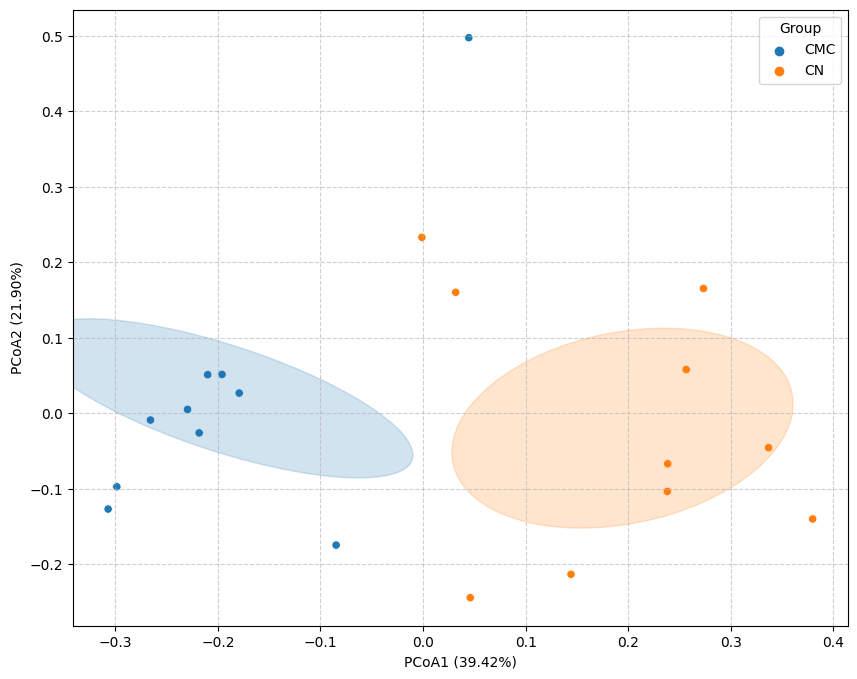

/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.03646030054273611 and the largest is 0.9507809845209676.



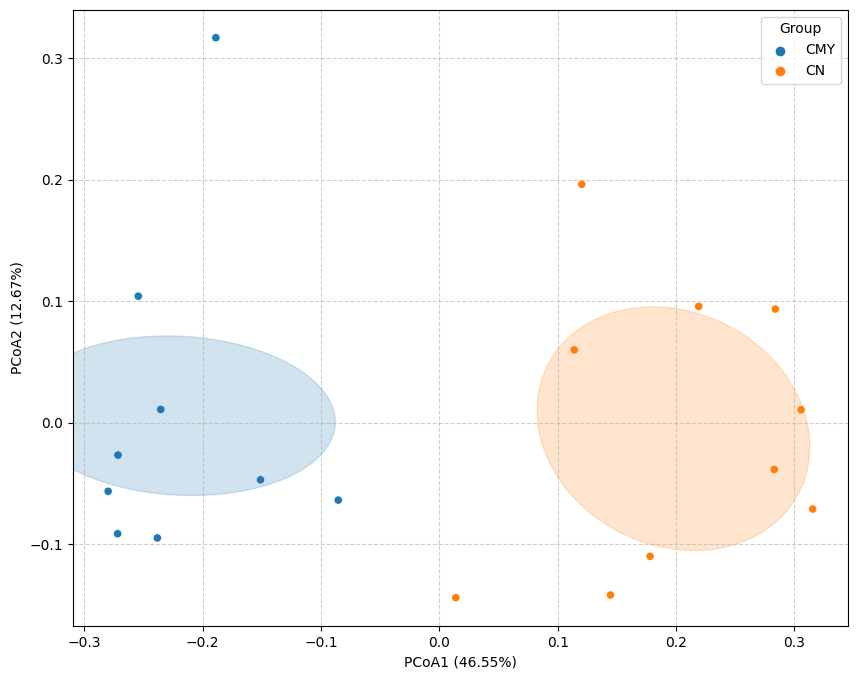

In [66]:
from skbio.stats.ordination import pcoa
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Преобразование расстояний Bray-Curtis в объект пакета skbio
from skbio import DistanceMatrix

def beta_vizualiztion(bray_curtis_df, firstable_data, group1 = "CMC"):
    
    dm = DistanceMatrix(bray_curtis_df)
    # Выполнение PCoA
    pcoa_results = pcoa(dm)
    # Собрать результаты в DataFrame
    pcoa_df = pd.DataFrame(data=pcoa_results.samples.values)
    pcoa_df['Group'] = firstable_data['Group'].values
    # Вычисление explained_variance_ratio
    explained_variance_ratio = pcoa_results.proportion_explained
    # Построение графика
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(data=pcoa_df, x=0, y=1, hue='Group') # Измените 0 и 1 на названия столбцов, если у вас есть названия
    # Добавление эллипсов
    for group, values in pcoa_df.groupby('Group'):
        cov = values[[0, 1]].cov().values # Измените 0 и 1 на названия столбцов, если у вас есть названия
        mean = values[[0, 1]].mean().values # Измените 0 и 1 на названия столбцов, если у вас есть названия
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, order]
        vx, vy = eigenvectors[:, 0]
        theta = np.arctan2(vy, vx)
        color = sns.color_palette()[list(pcoa_df['Group'].unique()).index(group)]
        ellipse = mpatches.Ellipse(xy=mean, width=np.sqrt(eigenvalues[0]) * 2, height=np.sqrt(eigenvalues[1]) * 2, angle=np.degrees(theta), color=color, alpha=0.2)
        plt.gca().add_artist(ellipse)

    ax.set_xlabel(f"PCoA1 ({explained_variance_ratio[0]*100:.2f}%)")
    ax.set_ylabel(f"PCoA2 ({explained_variance_ratio[1]*100:.2f}%)")

    plt.grid(True, linestyle='--', alpha=0.6)
    #plt.savefig(f'figures/beta_diversity/bray_curtis_{group1}.pdf', bbox_inches = 'tight')
    plt.show()

beta_vizualiztion(bray_curtis_distances_cmc, df_beta_cmc, 'CMC')
beta_vizualiztion(bray_curtis_distances_cmy, df_beta_cmy, 'CMY')

In [67]:
def beta_vizualiztion_plotly(bray_curtis_df, firstable_data, group1="CMC"):
    group_colors = {
    'CN': '#2d75a2',
    'CMC': '#e28228',
    'CMY': '#e28228'
    }
    dm = DistanceMatrix(bray_curtis_df)
    pcoa_results = pcoa(dm)
    pcoa_df = pd.DataFrame(data=pcoa_results.samples.values)
    pcoa_df['Group'] = firstable_data['Group'].values
    explained_variance_ratio = pcoa_results.proportion_explained
    fig = go.Figure()
    
    for group, values in pcoa_df.groupby('Group'):
        color = group_colors[group]
        fig.add_trace(go.Scatter(x=values[0], y=values[1], mode='markers', name=group, marker=dict(color=color)))

        cov = values[[0, 1]].cov().values
        mean = values[[0, 1]].mean().values
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, order]
        vx, vy = eigenvectors[:, 0]
        theta = np.arctan2(vy, vx)
        width = np.sqrt(eigenvalues[0]) * 2
        height = np.sqrt(eigenvalues[1]) * 2

        t = np.linspace(0, 2 * np.pi, 100)
        ellipse_x = mean[0] + width * 0.5 * np.cos(t) * np.cos(theta) - height * 0.5 * np.sin(t) * np.sin(theta)
        ellipse_y = mean[1] + width * 0.5 * np.cos(t) * np.sin(theta) + height * 0.5 * np.sin(t) * np.cos(theta)

        fig.add_trace(go.Scatter(x=ellipse_x, y=ellipse_y, mode='lines', showlegend=False, line=dict(color=color)))

    fig.update_xaxes(title_text=f"PCoA1 ({explained_variance_ratio[0]*100:.2f}%)",
                 gridcolor='LightGray',
                 gridwidth=1,
                 griddash="dash", # Исправленная часть
                 linecolor='Black',
                 linewidth=2)
    
    fig.update_yaxes(title_text=f"PCoA2 ({explained_variance_ratio[1]*100:.2f}%)",
                 gridcolor='LightGray',
                 gridwidth=1,
                 griddash="dash", # Исправленная часть
                 linecolor='Black',
                 linewidth=2)

    fig.update_layout(title=f"Visualization for {group1}",
                      plot_bgcolor='White', 
                      width=1200,
                      height=800)
    fig.write_html(f"figures/beta_diversity/plotly_beta_{group1}.html")
    fig.show()
    return pcoa_df

pcoa_df_cmc = beta_vizualiztion_plotly(bray_curtis_distances_cmc, df_beta_cmc, "CMC")
pcoa_df_cmy = beta_vizualiztion_plotly(bray_curtis_distances_cmy, df_beta_cmy, "CMY")


/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.04073317422076295 and the largest is 1.013350450197614.



/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.03646030054273611 and the largest is 0.9507809845209676.



In [68]:
from skbio import DistanceMatrix
from skbio.stats.distance import anosim, permanova

def beta_stats(bray_curtis_df, firstable_data, group1='CMC'):
    # Преобразование массива в матрицу расстояний
    distance_matrix = DistanceMatrix(bray_curtis_df)

    # Группировка по переменной 'Group'
    grouping = firstable_data['Group'].values

    # Проведение PERMANOVA теста
    permanova_results = permanova(distance_matrix, grouping)
    anosim_results = anosim(distance_matrix, grouping)

    print(f'\n\nCN vs {group1} stats PERMANOVA test result:\n {permanova_results}')
    print(f'\n\nCN vs {group1} stats ANOSIM test result:\n {anosim_results}')

beta_stats(bray_curtis_distances_cmc, df_beta_cmc)
beta_stats(bray_curtis_distances_cmy, df_beta_cmy, 'CMY')



CN vs CMC stats PERMANOVA test result:
 method name               PERMANOVA
test statistic name        pseudo-F
sample size                      20
number of groups                  2
test statistic             8.288843
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


CN vs CMC stats ANOSIM test result:
 method name                 ANOSIM
test statistic name              R
sample size                     20
number of groups                 2
test statistic            0.605111
p-value                      0.001
number of permutations         999
Name: ANOSIM results, dtype: object


CN vs CMY stats PERMANOVA test result:
 method name               PERMANOVA
test statistic name        pseudo-F
sample size                      19
number of groups                  2
test statistic            12.253264
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


CN vs CMY st

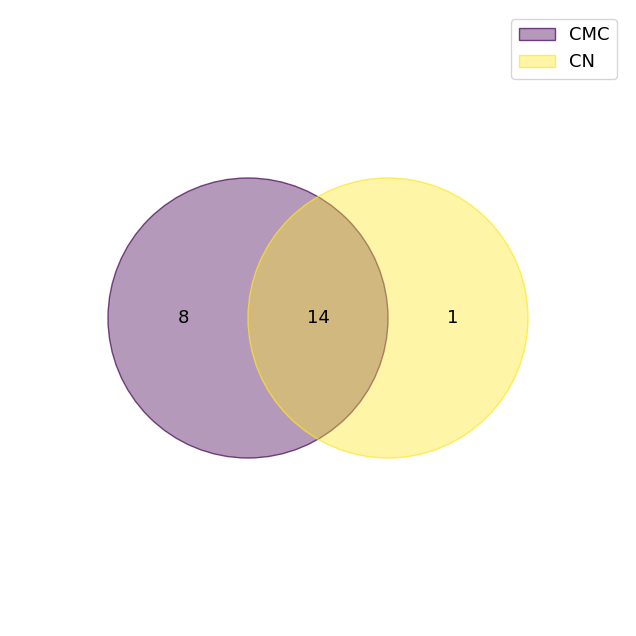

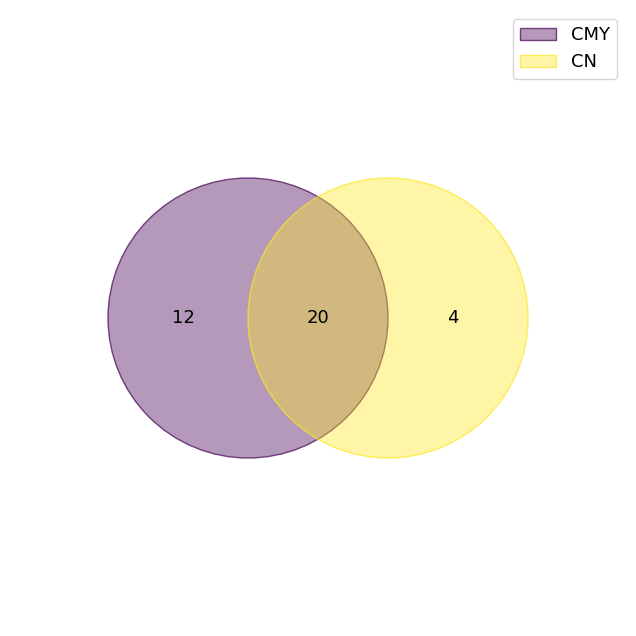

In [69]:
import pandas as pd
from venn import venn

def venn_diagram(firstable_data, group1 = "CMC"):
    df = pd.DataFrame(firstable_data)

    # Задание порога
    threshold = 0.006

    # Отбор строк для групп CMC и CN
    grou1_rows = df[df['Group'] == group1]
    cn_rows = df[df['Group'] == 'CN']

    # Определение множеств для CMC и CN, сравнивая только числовые столбцы (отсекая столбец 'Group')
    group1_otus = set(grou1_rows.columns[1:][(grou1_rows.iloc[:, 1:] > threshold).any(axis=0)])
    cn_otus = set(cn_rows.columns[1:][(cn_rows.iloc[:, 1:] > threshold).any(axis=0)])

    # Построение диаграммы Венна
    venn_diagram = venn({group1: group1_otus, 'CN': cn_otus})
    plt.savefig(f'figures/venn/venn_{group1}.pdf', bbox_inches = 'tight')

venn_diagram(merged_deleted_cmc_rel_dropped)
venn_diagram(merged_deleted_cmy_rel_dropped, 'CMY')

In [70]:
taxonomy = pd.read_csv('dataframes/taxonomy.csv', index_col=0, sep=',')
taxonomy

,Domain,Phylum,Class,Order,Family,Genus,Species,taxonomy
OTU,,,,,,,,
OTU1,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella_9,?,k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bact...
OTU2,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotellaceae NK3B31 group,?,k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bact...
OTU3,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,?,?,k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnos...
OTU4,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella_9,?,k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bact...
OTU5,Bacteria,Bacteroidota,Bacteroidia,?,?,?,?,k_Bacteria|p_Bacteroidota|c_Bacteroidia
...,...,...,...,...,...,...,...,...
OTU1510,Bacteria,Firmicutes,Clostridia,Peptococcales,Peptococcaceae,?,?,k_Bacteria|p_Firmicutes|c_Clostridia|o_Peptoco...
OTU1511,Bacteria,Proteobacteria,Alphaproteobacteria,Paracaedibacterales,Paracaedibacteraceae,?,uncultured prokaryote,k_Bacteria|p_Proteobacteria|c_Alphaproteobacte...
OTU1512,Bacteria,Firmicutes,Bacilli,Lactobacillales,Aerococcaceae,Globicatella,?,k_Bacteria|p_Firmicutes|c_Bacilli|o_Lactobacil...


In [71]:
def initial_data_preparation(initial_data):
    initial_data_preparation_cmc = initial_data.copy()
    initial_data_preparation_cmc = initial_data_preparation_cmc.reset_index()
    return initial_data_preparation_cmc.rename(columns= {"index":"SampleID"})
initial_data_preparation_cmc = initial_data_preparation(merged_deleted_cmc_rel_dropped)
initial_data_preparation_cmy = initial_data_preparation(merged_deleted_cmy_rel_dropped)
initial_data_preparation_cmc 

,SampleID,Group,OTU5,OTU6,OTU7,OTU11,OTU13,OTU22,OTU32,OTU33,...,OTU55,OTU56,OTU58,OTU59,OTU61,OTU62,OTU63,OTU71,OTU75,OTU99
0,BA1,CMC,0.036648,0.017263,0.011700,0.025321,0.008768,0.005536,0.002959,0.010043,...,0.013612,0.001493,0.003405,0.004097,0.017026,0.001830,0.002895,0.009069,0.006164,0.014286
1,BA10,CMC,0.045552,0.024354,0.004855,0.010232,0.008232,0.006302,0.005116,0.008926,...,0.008192,0.003598,0.001960,0.002744,0.003237,0.003920,0.002231,0.003438,0.005850,0.002824
2,BA2,CMC,0.051196,0.027956,0.004041,0.016729,0.005113,0.009043,0.003366,0.016285,...,0.021064,0.008281,0.007432,0.002430,0.003978,0.003962,0.002525,0.003557,0.006026,0.001048
3,BA3,CMC,0.061263,0.049940,0.061272,0.023460,0.008778,0.003904,0.016309,0.022395,...,0.001376,0.003688,0.000684,0.003575,0.012665,0.008587,0.006588,0.002389,0.009488,0.001775
4,BA4,CMC,0.044868,0.023354,0.005453,0.054154,0.009756,0.006756,0.004868,0.019626,...,0.005184,0.000824,0.004849,0.001830,0.023105,0.000326,0.001150,0.003019,0.004274,0.002118
5,BA5,CMC,0.009156,0.003877,0.002485,0.009037,0.010120,0.002057,0.000446,0.002266,...,0.002612,0.000655,0.000728,0.000828,0.000992,0.000974,0.000892,0.000974,0.001192,0.001502
6,BA6,CMC,0.046164,0.031609,0.009947,0.022051,0.006758,0.003347,0.002499,0.010716,...,0.009058,0.006536,0.003435,0.002768,0.001935,0.002332,0.005299,0.006584,0.006243,0.000682
7,BA7,CMC,0.089737,0.038536,0.004775,0.020515,0.007184,0.008649,0.007031,0.032441,...,0.003286,0.010206,0.004265,0.006367,0.005388,0.015382,0.006657,0.005337,0.007610,0.005720
8,BA8,CMC,0.086355,0.051275,0.013097,0.039985,0.004447,0.004725,0.005878,0.036192,...,0.002502,0.014004,0.001398,0.007930,0.007554,0.017184,0.011110,0.006197,0.009238,0.001406
9,BA9,CMC,0.034955,0.036193,0.007843,0.014422,0.012489,0.005642,0.007475,0.011919,...,0.011099,0.016339,0.001205,0.002871,0.008672,0.006772,0.004679,0.001306,0.004813,0.004754


In [72]:
import pandas as pd

# Определение функции форматирования таксономии
def format_taxonomy(row):
    prefixes = ['k_', 'p_', 'c_', 'o_', 'f_', 'g_', 's_']
    cols = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
    taxonomy = ''

    for prefix, col in zip(prefixes, cols):
        if row[col] != '?':
            taxonomy += prefix + row[col] + '|'
    
    return taxonomy.rstrip('|')

def taxonomy_conservation(taxonomy, initial_df, group1):
    # Применение функции форматирования к каждой строке датафрейма таксономии
    taxonomy['taxonomy'] = taxonomy.apply(format_taxonomy, axis=1)
    # Преобразование датафрейма try_to_galaxy_merged в формат "длинный"
    try_to_galaxy_long = initial_df.melt(id_vars=['SampleID', 'Group'], var_name='OTU', value_name='Value')
    # Слияние датафреймов OTU и таксономии по столбцу 'OTU'
    final_df = pd.merge(try_to_galaxy_long, taxonomy.reset_index(), on='OTU', how='left')
    # Создание нового сводного датафрейма с SampleID и Group в качестве столбцов
    new_pivot_df = final_df.pivot_table(index="taxonomy", columns=["Group", "SampleID"], values="Value")
    # Заполнение отсутствующих значений нулями
    new_pivot_df = new_pivot_df.fillna(0)
    # Изменение порядка уровней в MultiIndex в столбцах
    new_pivot_df = new_pivot_df.reorder_levels(['Group', 'SampleID'], axis=1)
    # Сортировка по обоим уровням в MultiIndex в столбцах
    new_pivot_df.sort_index(axis=1, level=['Group', 'SampleID'], inplace=True)

    # Вывод результата
    new_pivot_df.to_csv(f'dataframes/output_data/OTU/taxonomy_{group1}.csv', sep='\t')
    return new_pivot_df

new_pivot_cmc = taxonomy_conservation(taxonomy, initial_data_preparation_cmc, 'CMC')
new_pivot_cmy = taxonomy_conservation(taxonomy, initial_data_preparation_cmy, 'CMY')
new_pivot_cmc

Group                                                    CMC            \
SampleID                                                 BA1      BA10   
taxonomy                                                                 
k_Bacteria|p_Actinobacteriota|c_Actinobacteria|...  0.002895  0.002231   
k_Bacteria|p_Bacteroidota|c_Bacteroidia             0.013232  0.013874   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.002964  0.003332   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.008131  0.003799   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.009195  0.008317   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.013876  0.007126   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.013612  0.008192   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.008768  0.008232   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.002240  0.001277   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillos...  0.001630  0.002171   

Group                                                                   \
SampleID                                                 BA2       BA3   
taxonomy                                                                 
k_Bacteria|p_Actinobacteriota|c_Actinobacteria|...  0.002525  0.006588   
k_Bacteria|p_Bacteroidota|c_Bacteroidia             0.017715  0.022750   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.003196  0.006081   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.005828  0.001801   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.006230  0.018595   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.004843  0.003662   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.021064  0.001376   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.005113  0.008778   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.000921  0.014214   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillos...  0.002136  0.003090   

Group                                                                   \
SampleID                                                 BA4       BA5   
taxonomy                                                                 
k_Bacteria|p_Actinobacteriota|c_Actinobacteria|...  0.001150  0.000892   
k_Bacteria|p_Bacteroidota|c_Bacteroidia             0.019953  0.003708   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.001078  0.000901   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.005779  0.001502   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.009626  0.001418   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.003900  0.001675   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.005184  0.002612   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.009756  0.010120   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.001284  0.170556   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillos...  0.004092  0.001047   

Group                                                                   \
SampleID                                                 BA6       BA7   
taxonomy                                                                 
k_Bacteria|p_Actinobacteriota|c_Actinobacteria|...  0.005299  0.006657   
k_Bacteria|p_Bacteroidota|c_Bacteroidia             0.016520  0.025563   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.002550  0.010875   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.001325  0.002571   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.006241  0.009514   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.001832  0.003963   
k_Bacteria|p_Bacteroidota|c_Bacteroidia|o_Bacte...  0.009058  0.003286   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.006758  0.007184   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Lachnosp...  0.002261  0.000962   
k_Bacteria|p_Firmicutes|c_Clostridia|o_Oscillos...  0.003371  0.004307   

Group                                                                   \
SampleID                                                 BA8       BA9   


In [78]:
# Изменяем индекс в new_pivot_cmc
new_pivot_cmc.index = new_pivot_cmc.index.map(lambda x: x.split('|')[-1])

# Посмотрим на обновленный DataFrame
#new_pivot_cmc = new_pivot_cmc.drop(columns =['avg_CMC'])
new_pivot_cmc

Group                                 CMC                                \
SampleID                              BA1      BA10       BA2       BA3   
taxonomy                                                                  
s_Bifidobacterium animalis       0.002895  0.002231  0.002525  0.006588   
c_Bacteroidia                    0.013232  0.013874  0.017715  0.022750   
o_Bacteroidales                  0.002964  0.003332  0.003196  0.006081   
g_Bacteroides                    0.008131  0.003799  0.005828  0.001801   
f_Muribaculaceae                 0.009195  0.008317  0.006230  0.018595   
f_Prevotellaceae                 0.013876  0.007126  0.004843  0.003662   
g_Prevotella                     0.013612  0.008192  0.021064  0.001376   
g_Blautia                        0.008768  0.008232  0.005113  0.008778   
g_Lachnospiraceae NK4A136 group  0.002240  0.001277  0.000921  0.014214   
g_NK4A214 group                  0.001630  0.002171  0.002136  0.003090   

Group                                                                    \
SampleID                              BA4       BA5       BA6       BA7   
taxonomy                                                                  
s_Bifidobacterium animalis       0.001150  0.000892  0.005299  0.006657   
c_Bacteroidia                    0.019953  0.003708  0.016520  0.025563   
o_Bacteroidales                  0.001078  0.000901  0.002550  0.010875   
g_Bacteroides                    0.005779  0.001502  0.001325  0.002571   
f_Muribaculaceae                 0.009626  0.001418  0.006241  0.009514   
f_Prevotellaceae                 0.003900  0.001675  0.001832  0.003963   
g_Prevotella                     0.005184  0.002612  0.009058  0.003286   
g_Blautia                        0.009756  0.010120  0.006758  0.007184   
g_Lachnospiraceae NK4A136 group  0.001284  0.170556  0.002261  0.000962   
g_NK4A214 group                  0.004092  0.001047  0.003371  0.004307   

Group                                                      CN            \
SampleID                              BA8       BA9       BB1      BB10   
taxonomy                                                                  
s_Bifidobacterium animalis       0.011110  0.004679  0.000798  0.001231   
c_Bacteroidia                    0.029089  0.016604  0.013723  0.008242   
o_Bacteroidales                  0.012557  0.004821  0.000479  0.000545   
g_Bacteroides                    0.001717  0.002168  0.038790  0.007405   
f_Muribaculaceae                 0.013138  0.007016  0.017013  0.011213   
f_Prevotellaceae                 0.001386  0.004997  0.001474  0.001043   
g_Prevotella                     0.002502  0.011099  0.001615  0.001109   
g_Blautia                        0.004447  0.012489  0.020254  0.052297   
g_Lachnospiraceae NK4A136 group  0.004750  0.008253  0.000554  0.000865   
g_NK4A214 group                  0.001136  0.003892  0.008442  0.012743   

Group                                                                    \
SampleID                              BB2       BB3       BB4       BB5   
taxonomy                                                                  
s_Bifidobacterium animalis       0.000395  0.000631  0.000462  0.008140   
c_Bacteroidia                    0.010692  0.010198  0.013262  0.007138   
o_Bacteroidales                  0.004903  0.000558  0.000880  0.001366   
g_Bacteroides                    0.006596  0.003101  0.012058  0.004860   
f_Muribaculaceae                 0.025979  0.015164  0.012915  0.003832   
f_Prevotellaceae                 0.003264  0.001573  0.001258  0.003187   
g_Prevotella                     0.002343  0.000677  0.002429  0.005676   
g_Blautia                        0.004069  0.015448  0.032836  0.015683   
g_Lachnospiraceae NK4A136 group  0.000993  0.001996  0.000342  0.007316   
g_NK4A214 group                  0.003375  0.007780  0.016868  0.012798   

Group                                                                    
SampleID              

In [90]:
# Сбросим уровни MultiIndex столбцов
df = new_pivot_cmc.reset_index()
df.columns = ['_'.join(col).rstrip('_') for col in df.columns.values]

# Теперь преобразование
df_transposed = df.melt(id_vars="taxonomy", 
                        var_name="SampleID",
                        value_name="Value")

# Поворот данных обратно для желаемого формата
df_pivoted = df_transposed.pivot(index="SampleID", columns="taxonomy", values="Value").reset_index()

import pandas as pd

# Предполагается, что df - ваш текущий DataFrame

# Разбить столбец SampleID на две части
df_pivoted['Group'] = df_pivoted['SampleID'].str.split('_').str[0]
df_pivoted['SampleID'] = df_pivoted['SampleID'].str.split('_').str[1]

# Переупорядочить столбцы
cols = df_pivoted.columns.tolist()
cols = [cols[0], cols[-1]] + cols[1:-1]
df_pivoted = df_pivoted[cols]


df_pivoted

taxonomy,SampleID,Group,c_Bacteroidia,f_Muribaculaceae,f_Prevotellaceae,g_Bacteroides,g_Blautia,g_Lachnospiraceae NK4A136 group,g_NK4A214 group,g_Prevotella,o_Bacteroidales,s_Bifidobacterium animalis
0,BA1,CMC,0.013232,0.009195,0.013876,0.008131,0.008768,0.002240,0.001630,0.013612,0.002964,0.002895
1,BA10,CMC,0.013874,0.008317,0.007126,0.003799,0.008232,0.001277,0.002171,0.008192,0.003332,0.002231
2,BA2,CMC,0.017715,0.006230,0.004843,0.005828,0.005113,0.000921,0.002136,0.021064,0.003196,0.002525
3,BA3,CMC,0.022750,0.018595,0.003662,0.001801,0.008778,0.014214,0.003090,0.001376,0.006081,0.006588
4,BA4,CMC,0.019953,0.009626,0.003900,0.005779,0.009756,0.001284,0.004092,0.005184,0.001078,0.001150
5,BA5,CMC,0.003708,0.001418,0.001675,0.001502,0.010120,0.170556,0.001047,0.002612,0.000901,0.000892
6,BA6,CMC,0.016520,0.006241,0.001832,0.001325,0.006758,0.002261,0.003371,0.009058,0.002550,0.005299
7,BA7,CMC,0.025563,0.009514,0.003963,0.002571,0.007184,0.000962,0.004307,0.003286,0.010875,0.006657
8,BA8,CMC,0.029089,0.013138,0.001386,0.001717,0.004447,0.004750,0.001136,0.002502,0.012557,0.011110
9,BA9,CMC,0.016604,0.007016,0.004997,0.002168,0.012489,0.008253,0.003892,0.011099,0.004821,0.004679


In [ ]:
pathway_data_cmc = pd.read_csv('dataframes/output_data/final_pathway_cmc.csv', sep = '\t')
pathway_data_cmc

,description,CMC,CN_CMC,p_value,diff
0,2-methylcitrate cycle II,5.218603e-06,0.000015,0.027752,0.000010
1,3-phenylpropanoate degradation,7.363642e-07,0.000002,0.025040,0.000001
2,L-lysine biosynthesis III,9.105793e-03,0.008725,0.010039,-0.000381
3,L-lysine fermentation to acetate and butanoate,9.958894e-05,0.000135,0.033484,0.000035
4,N10-formyl-tetrahydrofolate biosynthesis,7.615081e-03,0.007248,0.015427,-0.000367
5,NAD salvage pathway II,6.024187e-06,0.000020,0.038141,0.000014
6,coenzyme M biosynthesis I,3.472327e-06,0.000016,0.044438,0.000012
7,creatinine degradation I,3.210251e-05,0.000013,0.029599,-0.000019
8,ethylmalonyl-CoA pathway,2.635243e-05,0.000013,0.038660,-0.000013
9,formaldehyde assimilation I (serine pathway),3.608212e-05,0.000017,0.031340,-0.000019


In [ ]:
from scipy.stats import kendalltau
common_indices = pathway_data_cmc.index.intersection(new_pivot_cmc.index)
correlation_CMC, _ = kendalltau(pathway_data_cmc.loc[common_indices, 'CMC'], new_pivot_cmc.loc[common_indices, 'avg_CMC'])
print(common_indices)
print(correlation_CMC)

Index([], dtype='object')
nan


In [86]:
import pandas as pd
from scipy.stats import kendalltau
df_pivoted
pathway_data_cmc
# Вычисление средних значений для каждой строки из df_pivoted
df_pivoted['avg_CMC'] = df_pivoted[['CMC', 'CN']].mean(axis=1)

# Корреляция Кенделла между avg_CMC и CMC из pathway_data_cmc
correlation_CMC, _ = kendalltau(pathway_data_cmc['CMC'], df_pivoted['avg_CMC'])
print(f"Kendall correlation between avg_CMC and CMC from pathway_data_cmc: {correlation_CMC:.4f}")

# Корреляция Кенделла между avg_CMC и CN_CMC из pathway_data_cmc
correlation_CN_CMC, _ = kendalltau(pathway_data_cmc['CN_CMC'], df_pivoted['avg_CMC'])
print(f"Kendall correlation between avg_CMC and CN_CMC from pathway_data_cmc: {correlation_CN_CMC:.4f}")


KeyError: "None of [Index(['CMC', 'CN'], dtype='object', name='taxonomy')] are in the [columns]"